## Fetch Data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read data with headers
headers = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]

data = pd.read_table('cardata.txt', delimiter = ',', names=headers)
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


## Exploratory Data Analysis and Data Visualization 

In [3]:
# information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [5]:
# check the unique values 
for column in ((data.drop('class', axis = 1)).columns):
    print(f"Unique values of '{column}' column = {(data.drop('class', axis = 1)[column].unique())}")

Unique values of 'buying' column = ['vhigh' 'high' 'med' 'low']
Unique values of 'maint' column = ['vhigh' 'high' 'med' 'low']
Unique values of 'doors' column = ['2' '3' '4' '5more']
Unique values of 'persons' column = ['2' '4' 'more']
Unique values of 'lug_boot' column = ['small' 'med' 'big']
Unique values of 'safety' column = ['low' 'med' 'high']


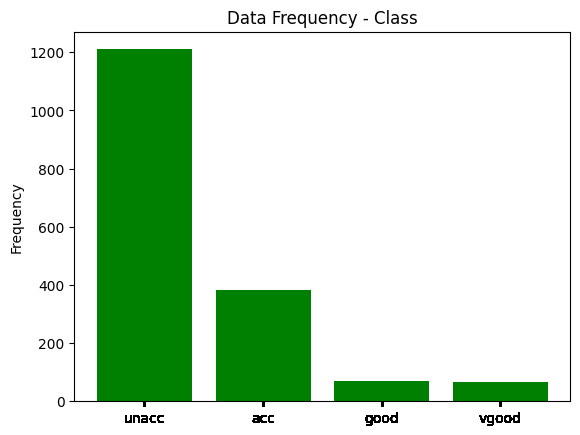

Number of Class 
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [6]:
# Number of Knowledge Level 
plt.figure()
plt.bar(data["class"].value_counts().index, data["class"].value_counts(), color = "green")
plt.xticks(data["class"].values)
plt.ylabel("Frequency")
plt.title(f"Data Frequency - Class")
plt.show()
print(f"Number of Class \n{data['class'].value_counts()}")

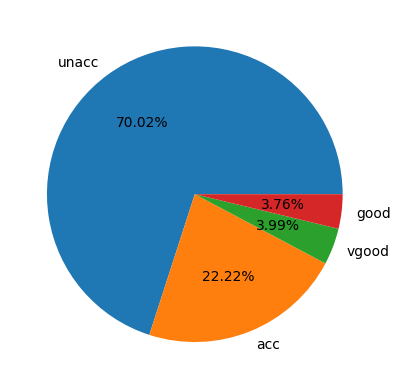

In [7]:
# plot a pie chart and see percentages of classes
plt.pie(data['class'].value_counts(), labels=data['class'].unique(), autopct='%1.2f%%')
plt.show() 

In [8]:
# create a function for plot bar graph 
def plotBar(column, n=10):
    """
        input: column name
               n = the most unique value you want to see, default = 10
        output: Bar plot
    """
    data_ = data[column]
    data_count = data_.value_counts()
    data_count = data_count[:n]
    plt.figure()
    plt.bar(data_count.index, data_count, color = "m")
    plt.xticks(data_count.index, data_count.index.values)
    plt.xticks(rotation=45)
    plt.ylabel("Frequency")
    plt.title(f"Data Frequency - {column}")
    plt.show()
    print(f"   {column}\n{data_count}")

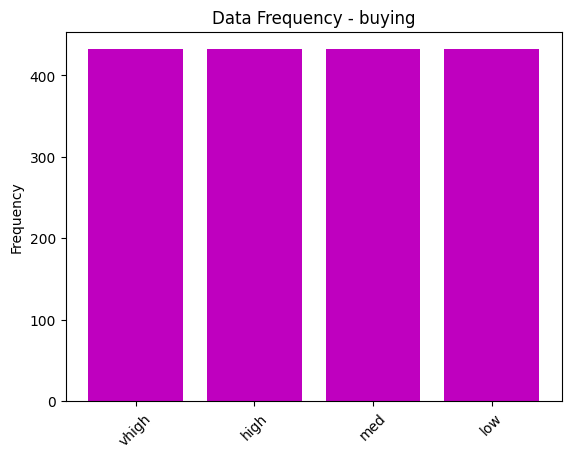

   buying
vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64


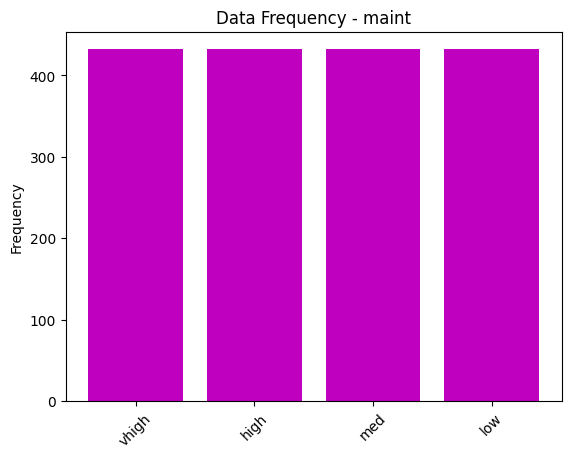

   maint
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64


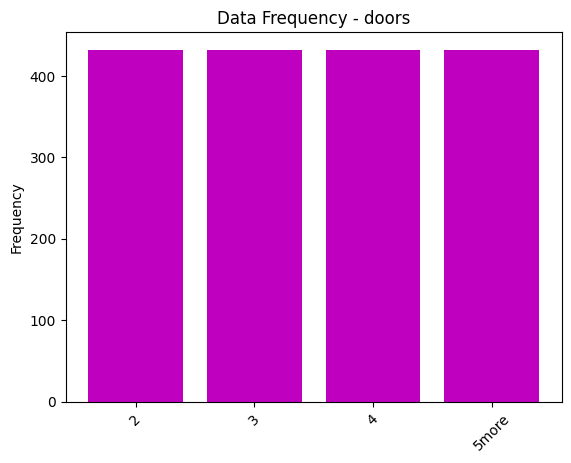

   doors
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64


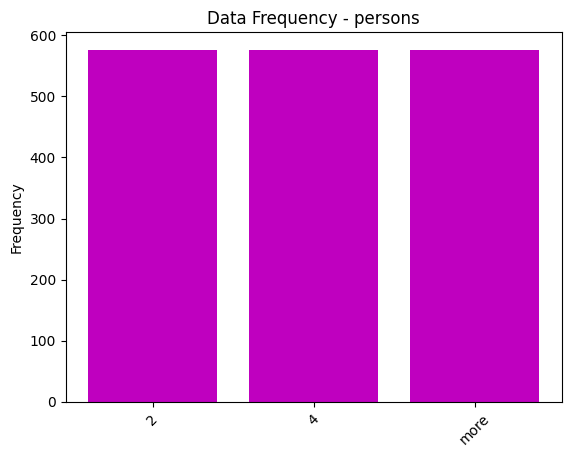

   persons
2       576
4       576
more    576
Name: persons, dtype: int64


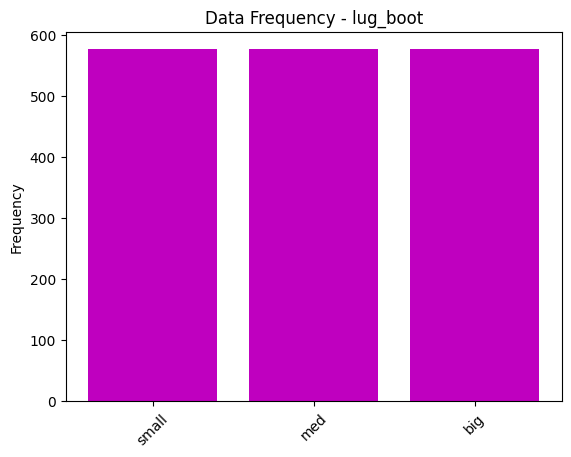

   lug_boot
small    576
med      576
big      576
Name: lug_boot, dtype: int64


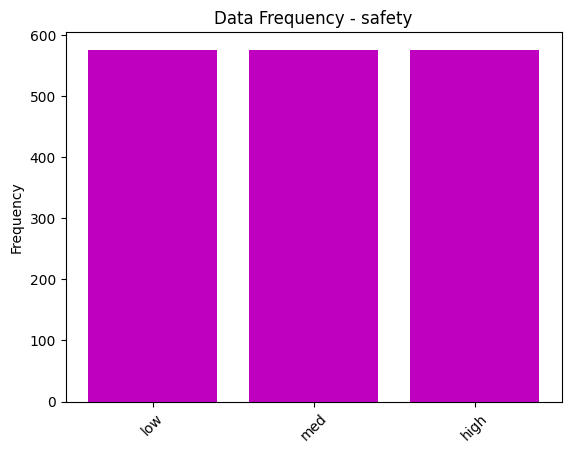

   safety
low     576
med     576
high    576
Name: safety, dtype: int64


In [9]:
# plot bar graph for categorical variables
categorical_variables = ["buying", "maint", "doors", "persons", "lug_boot", "safety"]
for i in categorical_variables:
    plotBar(i)

In [10]:
#Exploratory Visualization

def visualization(column):
    def values(column):
        d = {} #creating a dictionary
        d1 = data[[column, 'class']] #extracting the column and the class columns from the data
        for j in d1[column].unique(): #for each unique attribute of the selected column
            d2 = (d1[d1[column] == j])['class'].value_counts()  #give the number of unacc, acc, good and vgood for each attribute
            for i in d1['class'].unique(): #unique values of class - unacc, acc, good, vgood
                if i in d2: 
                    if i in d:
                        d[i].append(d2[i]) 
                    else:
                        d[i] = []   #creating a key with the name of the target label and the value is the number of examples
                        d[i].append(d2[i])
                else:
                    if i in d:
                        d[i].append(0)
                    else:
                        d[i] = []
                        d[i].append(0)
        return d
    
    N=len(data[column].unique())
    w=0.3
    x=np.arange(N)
    dict1 = values(column)
    ax = plt.subplot(111)
    p1 = ax.bar(x-(1.5*w), dict1['unacc'], width = w, color = 'b', align = 'center')
    p2 = ax.bar(x-(0.5*w), dict1['acc'], width = w, color = 'g', align = 'center')
    p3 = ax.bar(x+(w*0.5), dict1['good'], width = w, color = 'r', align  = 'center')
    p4 = ax.bar(x+(w*1.5), dict1['vgood'], width  = w, align  = 'center')

    ax.autoscale(tight=True)
    plt.xlabel("'{}' column".format(column))
    plt.title(f"'{column}' column distribution by class Label")
    plt.ylabel('Frequency')
    plt.xticks(x, data[column].unique())
    plt.yticks(np.arange(0, 500, 50))
    plt.legend((p1[0], p2[0], p3[0], p4[0]), ('unacc', 'acc', 'good', 'vgood'))
    plt.show()

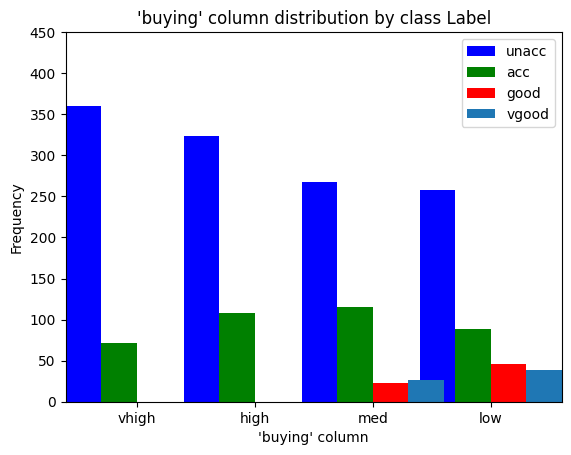

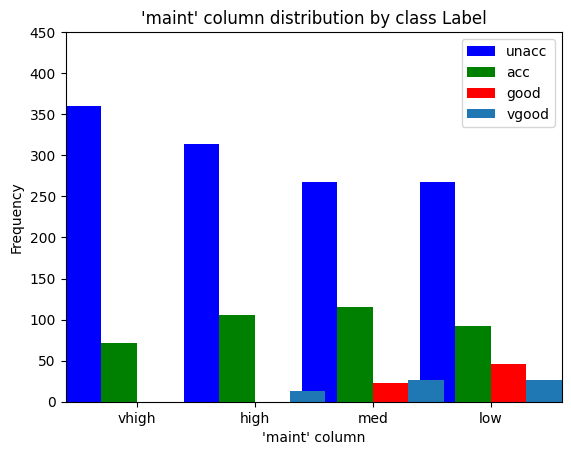

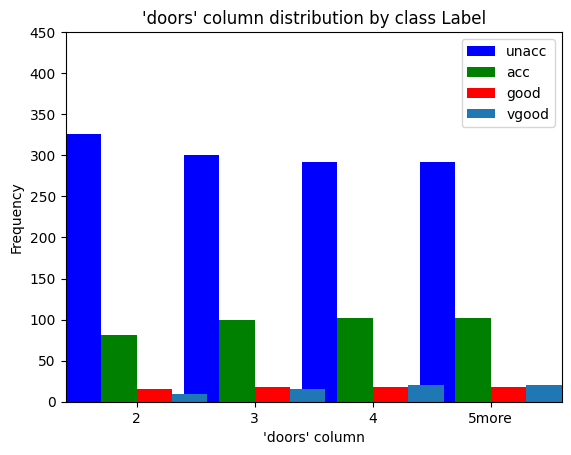

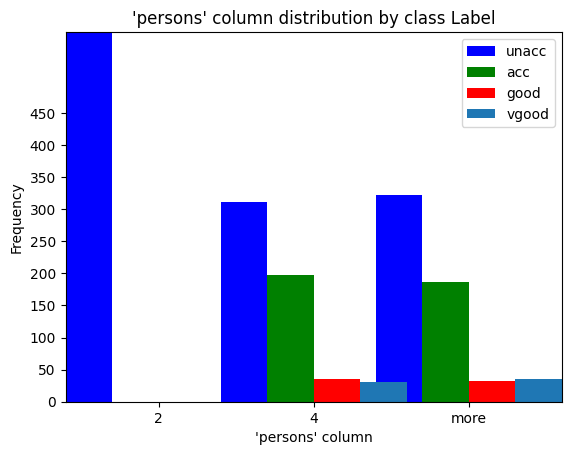

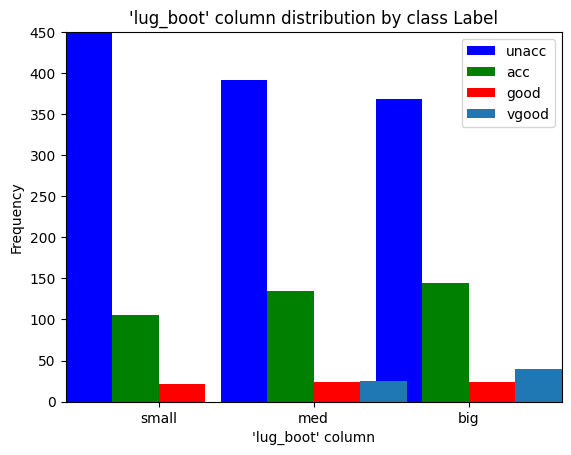

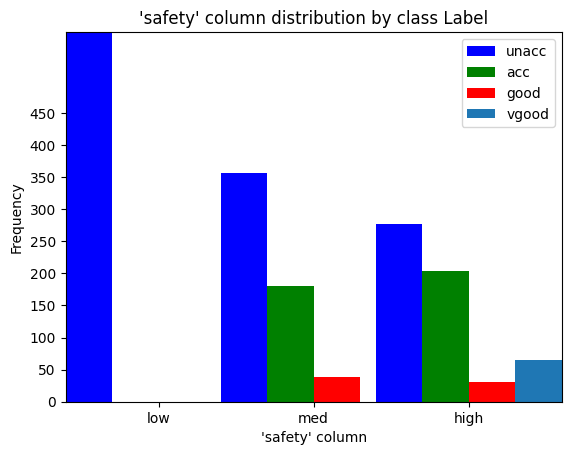

In [11]:
columns_name = data.drop(labels="class", axis=1).columns
for i in columns_name:
    visualization(i)

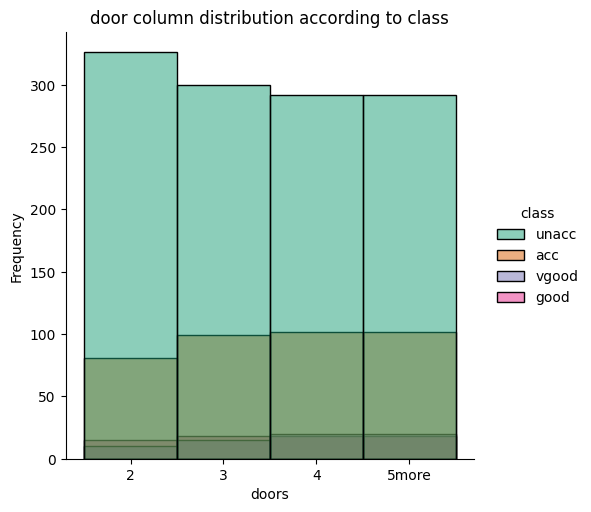

In [12]:
sns.displot(data, x="doors", hue="class", palette="Dark2")
plt.ylabel("Frequency")
plt.title("door column distribution according to class")
plt.show()

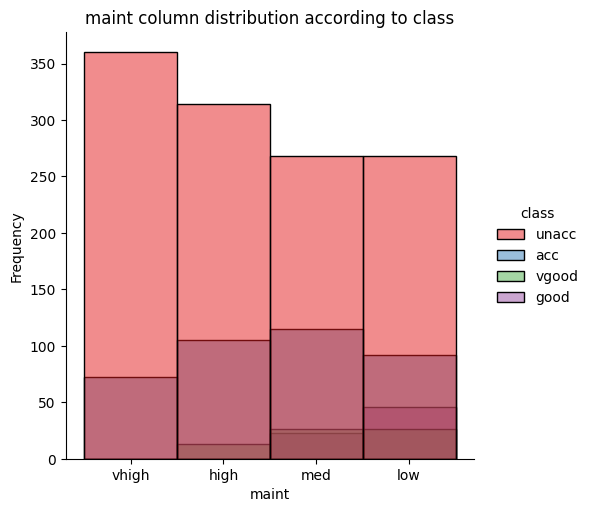

In [13]:
sns.displot(data, x="maint", hue="class", palette="Set1")
plt.ylabel("Frequency")
plt.title("maint column distribution according to class")
plt.show()

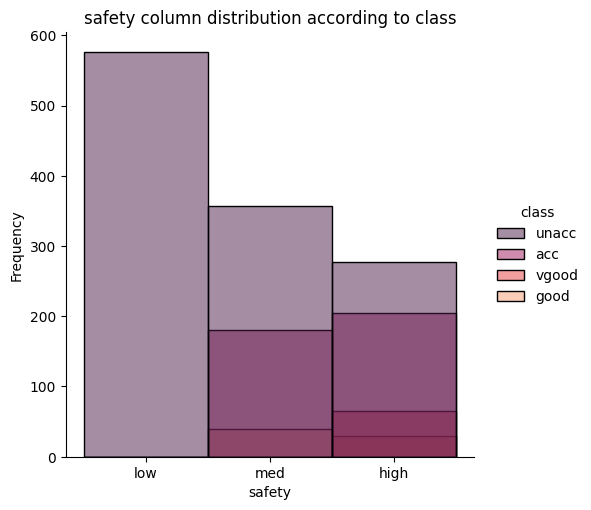

In [14]:
sns.displot(data, x="safety", hue="class", palette="rocket")
plt.ylabel("Frequency")
plt.title("safety column distribution according to class")
plt.show()

## Preprocessing

In [15]:
from sklearn.preprocessing import LabelEncoder
# define a function for label encoding
def labelEncoder(labelColumn):
    labelValues = labelColumn
    unique_labels = labelColumn.unique()
    le = LabelEncoder()
    labelColumn = le.fit_transform(labelColumn)
    print('Encoding Approach:')
    for i, j in zip(unique_labels, labelColumn[np.sort(np.unique(labelColumn, return_index=True)[1])]): 
        print(f'{i}  ==>  {j}')
    return labelColumn

In [16]:
for i in data.columns:
    print(f"For {i} column ")
    data[f"{i}"] = labelEncoder(data[f"{i}"])

For buying column 
Encoding Approach:
vhigh  ==>  3
high  ==>  0
med  ==>  2
low  ==>  1
For maint column 
Encoding Approach:
vhigh  ==>  3
high  ==>  0
med  ==>  2
low  ==>  1
For doors column 
Encoding Approach:
2  ==>  0
3  ==>  1
4  ==>  2
5more  ==>  3
For persons column 
Encoding Approach:
2  ==>  0
4  ==>  1
more  ==>  2
For lug_boot column 
Encoding Approach:
small  ==>  2
med  ==>  1
big  ==>  0
For safety column 
Encoding Approach:
low  ==>  1
med  ==>  2
high  ==>  0
For class column 
Encoding Approach:
unacc  ==>  2
acc  ==>  0
vgood  ==>  3
good  ==>  1


In [17]:
data

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [18]:
# create input and output
X = data.drop('class', axis = 1)
y = data['class']

In [19]:
# for train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=128)

# see train and test dataset shape
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (1468, 6)
y_train: (1468,)
X_test: (260, 6)
y_test: (260,)


## Model Training and Evaluation

In [20]:
# import classifiers and metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

def allClassifiers(X_train, X_test, y_train, y_test):
    """
    This function use multple machine learning classifier and show us the results of them 
    :param X_train: train input
    :param X_test: test input
    :param y_train: train output
    :param y_test: test output
    :return: accuracy score, classification report, confusion matrix for each classifier 
    and comparison plot for classifiers according to accuracy
    """
    
    
    classifiers = [SVC(), DecisionTreeClassifier(), GaussianNB(), KNeighborsClassifier(),
                   BaggingClassifier(), RandomForestClassifier(), AdaBoostClassifier(),
                   LogisticRegression(), XGBClassifier()]
    accuracy_score_dict = {}
    acc_scores = []
    
    
    # function for accuracy score
    def accScore(classifier):
        """
        :param classifier: classifier model function
        :return: accuracy score for classifier
        """
        
        clf = classifier.fit(X_train, y_train)
        pred = clf.predict(X_test)
        acc_score = accuracy_score(y_test, pred)
        return acc_score
    

    # function for confusion matrix and classification report
    def confusionandReport(classifier):
        """
        :param classifier: classifier model function
        :return: confusion matrix and classification report for classifier
        """
        
        clf = classifier.fit(X_train, y_train)
        pred = clf.predict(X_test)
        print(f"Confusion Matrix and Classification Report for {classifier} Classifier")
        print(confusion_matrix(y_test, pred))
        print(classification_report(y_test, pred))


    # accuracy score, confusion matrix and classification report for each classifier 
    for classifier in classifiers:
        name = classifier.__class__.__name__
        accuracy_score_dict[name] = accScore(classifier)
        acc_scores.append(accScore(classifier))
        print("*************************************************************************")
        print(f"{name} Accuracy Score = {accuracy_score_dict[name]}")
        confusionandReport(classifier)
        

    #Plotting the performance of Classifiers
    def plotPerformance(scores_list, scores_dict):
        """
        :param scores_list: list that include evaluation scores 
        :param scores_dict: dictionary that include classifier and evaluation scores
        :return: plot of performance comparison of classifiers
        """
        
        N = len(classifiers)
        w = 0.5
        x = np.arange(N)
        plt.bar(x, scores_list, width = w, align = 'center', color="g")
        plt.xlabel("Classifiers")
        plt.title("Performance Comparison of Classifiers")
        plt.ylabel("Accuracy Score")
        plt.xticks(x,
                   scores_dict.keys(),
                   rotation=90)
        plt.yticks(np.arange(0, 1.1, 0.1))
        plt.show()
    
    # call the function
    plotPerformance(acc_scores, accuracy_score_dict)

*************************************************************************
SVC Accuracy Score = 0.9653846153846154
Confusion Matrix and Classification Report for SVC() Classifier
[[ 64   2   2   0]
 [  3   6   0   0]
 [  1   0 170   0]
 [  1   0   0  11]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        68
           1       0.75      0.67      0.71         9
           2       0.99      0.99      0.99       171
           3       1.00      0.92      0.96        12

    accuracy                           0.97       260
   macro avg       0.92      0.88      0.90       260
weighted avg       0.96      0.97      0.96       260

*************************************************************************
DecisionTreeClassifier Accuracy Score = 0.9884615384615385
Confusion Matrix and Classification Report for DecisionTreeClassifier() Classifier
[[ 67   0   1   0]
 [  0   9   0   0]
 [  2   0 169   0]
 [  0   0   0  12]]
              pre

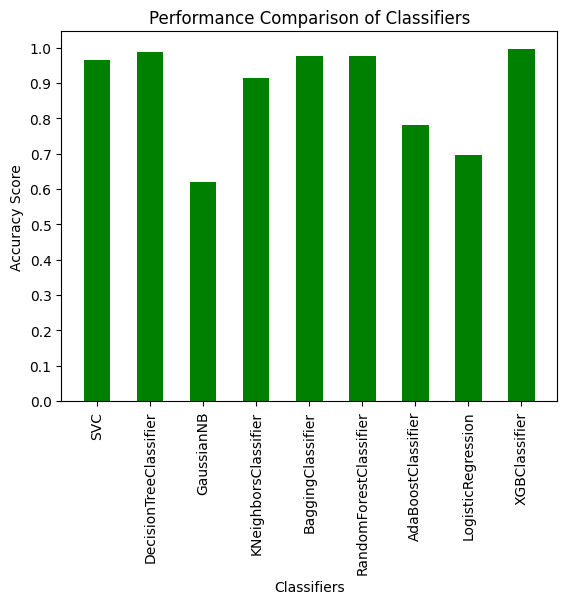

In [21]:
allClassifiers(X_train, X_test, y_train, y_test)

## Model Selection and Parameter Tuning

In [22]:
# Choose the best 2 models
# XGBClassifier Test Accuracy: 0.9961 so there is no need parameter tuning, we can optimize KNeighborsClassifier Test Accuracy: 0.9153
kn_model = KNeighborsClassifier()
kn_model.fit(X_train, y_train)
kn_train_predictions = kn_model.predict(X_train)
kn_test_predictions = kn_model.predict(X_test)
print('Train Accuracy Score for KNeighbors Classifier:', accuracy_score(kn_train_predictions, y_train))
print("Test Accuracy Score for KNeighbors Classifier:", accuracy_score(kn_test_predictions, y_test))
print(confusion_matrix(y_test, kn_test_predictions))
print(classification_report(y_test, kn_test_predictions))

Train Accuracy Score for KNeighbors Classifier: 0.9434604904632152
Test Accuracy Score for KNeighbors Classifier: 0.9153846153846154
[[ 58   1   9   0]
 [  5   3   0   1]
 [  2   0 169   0]
 [  3   0   1   8]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        68
           1       0.75      0.33      0.46         9
           2       0.94      0.99      0.97       171
           3       0.89      0.67      0.76        12

    accuracy                           0.92       260
   macro avg       0.86      0.71      0.76       260
weighted avg       0.91      0.92      0.91       260



In [23]:
# GridSearchCV for KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
kn_params = {'n_neighbors' : [2,3,5,7,9,11,13,15],
             'weights' : ['uniform', 'distance'],
             'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'leaf_size': [20, 40, 15],
             'metric' : ['minkowski', 'euclidean', 'manhattan']}
gsc_rf = GridSearchCV(kn_model, kn_params, cv=5, verbose=1, n_jobs=1)
grid_results_rf = gsc_rf.fit(X_train, y_train)
grid_results_rf.best_params_

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


{'algorithm': 'ball_tree',
 'leaf_size': 15,
 'metric': 'manhattan',
 'n_neighbors': 7,
 'weights': 'distance'}

In [24]:
# Summarize the results in a readable format
print(f"Best 8 test score: {(np.sort(grid_results_rf.cv_results_['mean_test_score']))[::-1][:8]}")
results_df = pd.DataFrame(grid_results_rf.cv_results_)

cleaned_results_df = results_df[["mean_fit_time", "mean_test_score", "std_test_score", "rank_test_score"]]
cleaned_results_df.sort_values("rank_test_score",).head(3)

Best 8 test score: [0.92371665 0.92029672 0.92029672 0.92029672 0.91962806 0.91962573
 0.91894778 0.91893385]


,mean_fit_time,mean_test_score,std_test_score,rank_test_score
279,0.006941,0.923717,0.013314,1
517,0.000436,0.920297,0.014862,2
469,0.001312,0.920297,0.014862,2


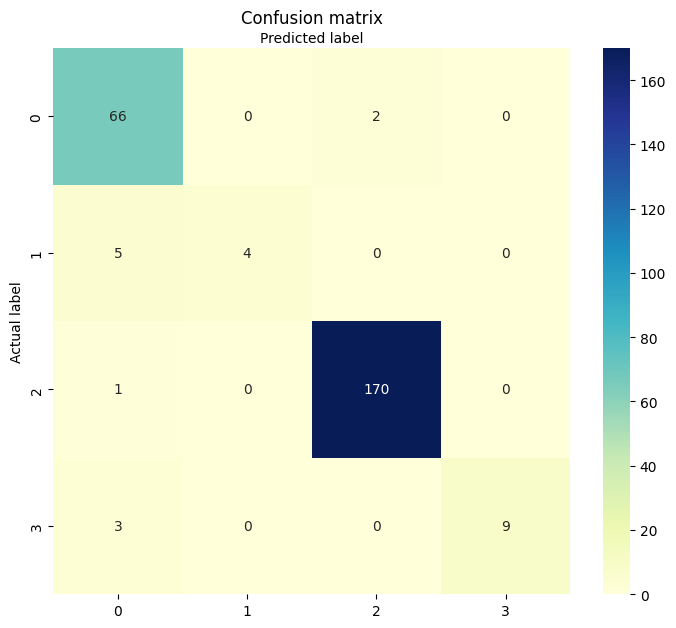

After Tuning Test Accuracy Score for KNeighbors Classifier: 0.9576923076923077


In [25]:
# Extract the best model
best_clf = grid_results_rf.best_estimator_
y_pred = best_clf.predict(X_test)

# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Create heatmap from the confusion matrix
%matplotlib inline
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print("After Tuning Test Accuracy Score for KNeighbors Classifier:", accuracy_score(y_pred, y_test))

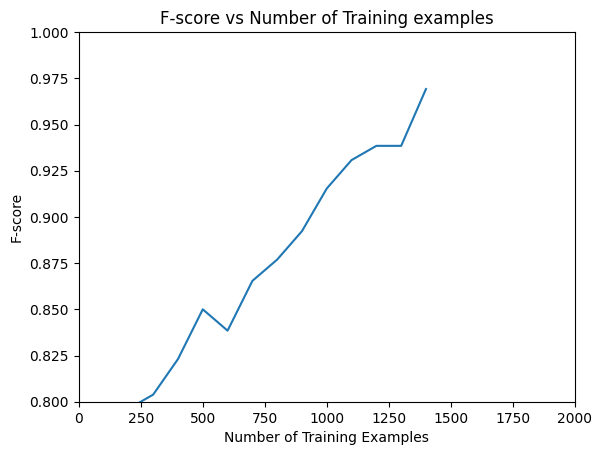

In [26]:
#Measuring performance of the model with different sample size of the training data
def sample_predictions(sample_size):
    optimum_model = best_clf
    input_sample = X_train[:sample_size]
    class_sample = y_train[:sample_size]
    optimum_model = optimum_model.fit(input_sample,class_sample)
    sample_predictions = optimum_model.predict(X_test)
    sample_score = f1_score(sample_predictions, y_test, average = 'micro')
    return sample_score

x_values = []
y_values = []
counter = 100
while(counter <=len(y_train)):
    x_values.append(counter)
    y_values.append(sample_predictions(counter))
    counter = counter + 100
plt.plot(x_values, y_values)
plt.axis([0,2000, 0.8, 1])
plt.title("F-score vs Number of Training examples")
plt.xlabel("Number of Training Examples")
plt.ylabel("F-score")
plt.show()